In [1]:
import pandas as pd
data=pd.read_csv('C:/Users/hp/Downloads/housing data.csv')
data.head()

,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
0,6300000,Secondary,Опалиха,6,Moscow region,1,30.6,11.1,8.5,25,25,Cosmetic
1,9000000,Secondary,Павшино,2,Moscow region,1,49.2,20.0,10.0,6,15,European-style renovation
2,11090000,Secondary,Мякинино,14,Moscow region,1,44.7,16.2,13.1,10,25,Cosmetic
3,8300000,Secondary,Строгино,8,Moscow region,1,35.1,16.0,11.0,12,33,European-style renovation
4,6450000,Secondary,Опалиха,6,Moscow region,1,37.7,15.2,4.0,5,5,Without renovation


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22676 entries, 0 to 22675
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             22676 non-null  int64  
 1   Apartment type    22676 non-null  object 
 2   Metro station     22676 non-null  object 
 3   Minutes to metro  22676 non-null  int64  
 4   Region            22676 non-null  object 
 5   Number of rooms   22676 non-null  int64  
 6   Area              22676 non-null  float64
 7   Living area       22676 non-null  float64
 8   Kitchen area      22676 non-null  float64
 9   Floor             22676 non-null  int64  
 10  Number of floors  22676 non-null  int64  
 11  Renovation        22676 non-null  object 
dtypes: float64(3), int64(5), object(4)
memory usage: 2.1+ MB


In [3]:
data.shape

(22676, 12)

In [4]:
data.isnull().sum()*100/data.shape[0]

Price               0.0
Apartment type      0.0
Metro station       0.0
Minutes to metro    0.0
Region              0.0
Number of rooms     0.0
Area                0.0
Living area         0.0
Kitchen area        0.0
Floor               0.0
Number of floors    0.0
Renovation          0.0
dtype: float64

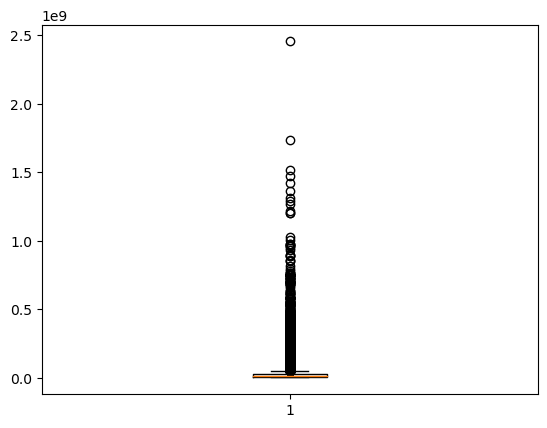

In [5]:
import matplotlib.pyplot as plt
plt.boxplot(data.Price)
Q1 = data.Price.quantile(0.25)
Q3 = data.Price.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.Price >= Q1 - 1.5*IQR) & (data.Price <= Q3 + 1.5*IQR)]

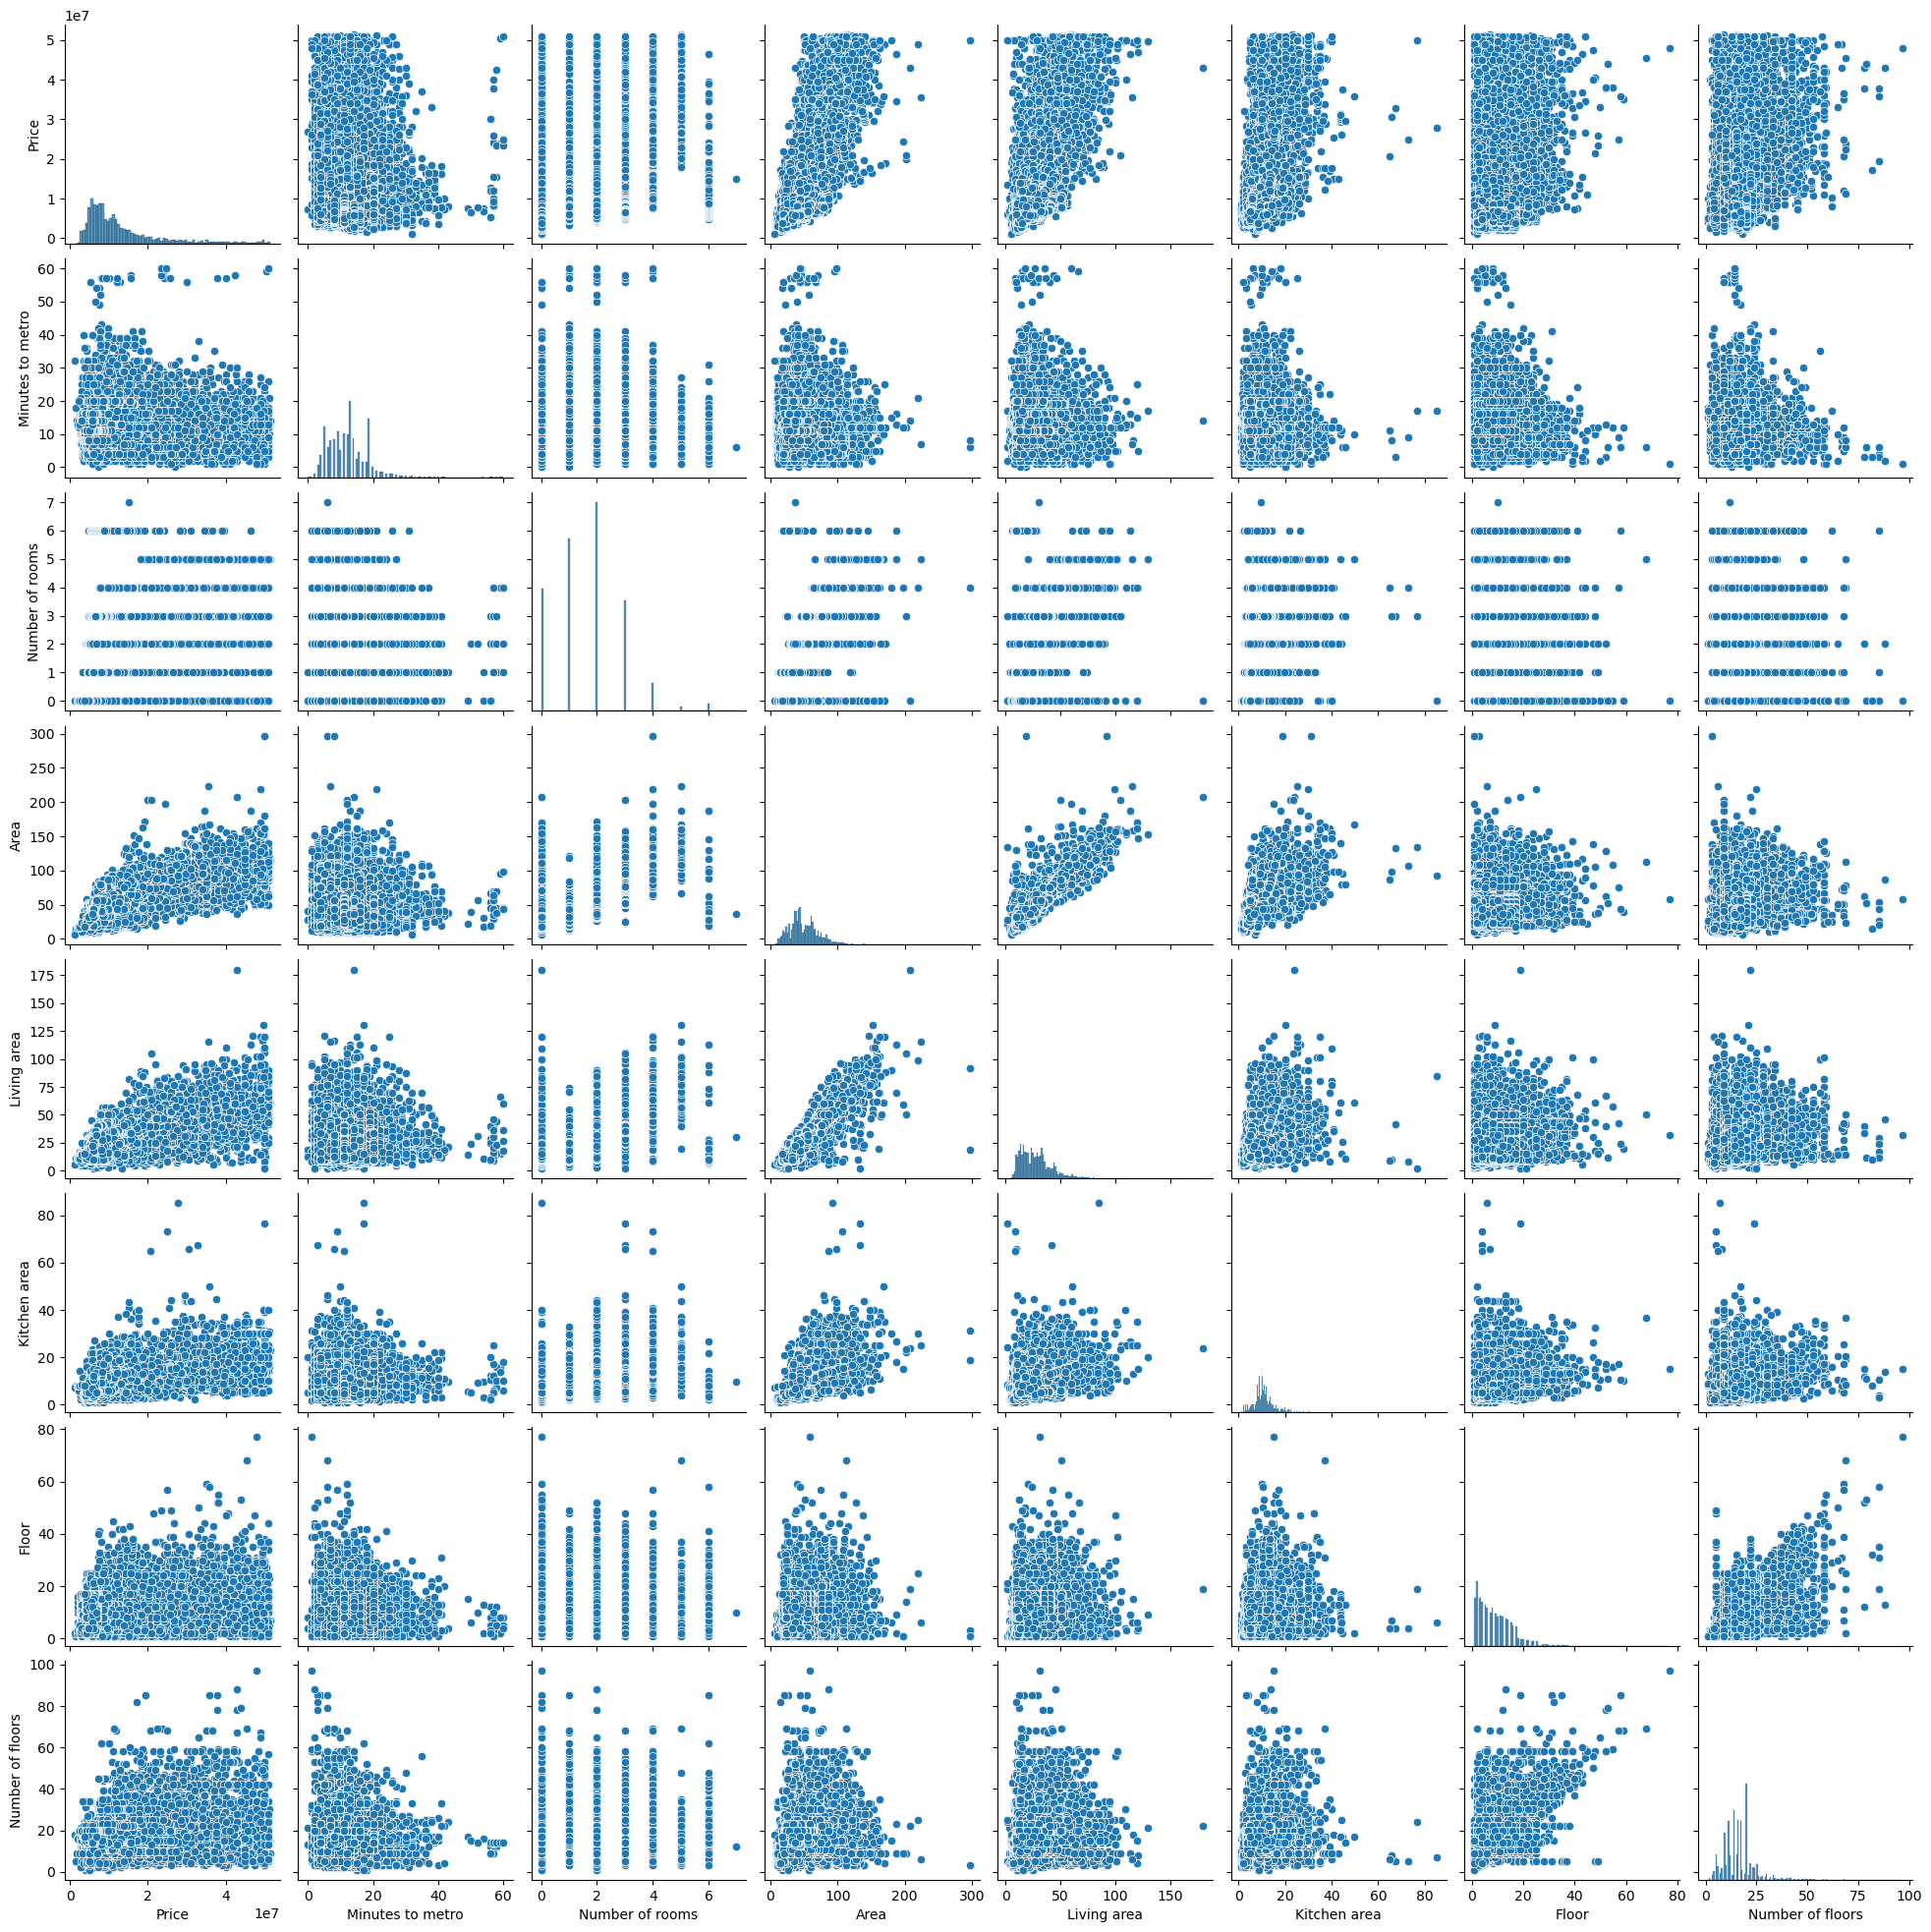

In [9]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.pairplot(data)
plt.show()

In [8]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Separating features (X) and target (y)
X = data.drop(columns='Price')
y = data['Price']

# Identifying categorical and numerical columns
categorical_cols = ['Apartment type', 'Metro station', 'Region', 'Renovation']
numerical_cols = X.columns.difference(categorical_cols)

# Preprocessing pipeline: scaling numerical features and one-hot encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_cols)
    ])

# Ridge regression with cross-validated alpha
ridge_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0], cv=5))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model with cross-validation to find the best alpha
ridge_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_ridge = ridge_model.predict(X_test)

r2_ridge = r2_score(y_test, y_pred_ridge)
print("R-squared:", r2_ridge)

R-squared: 0.8732684538615874
